In [1]:
import theano.tensor as T
from theano import function

Couldn't import dot_parser, loading of dot files will not be possible.


Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [13]:
x = T.dscalar('x')
y = T.dscalar('y')
z = x + y
f = function([x, y], z)

print f(2, 3)
print f(16.3, 12.1)
print type(x)
print x.type
print T.dscalar
print x.type is T.dscalar

5.0
28.4
<class 'theano.tensor.var.TensorVariable'>
TensorType(float64, scalar)
TensorType(float64, scalar)
True


## Logistic Regression

In [15]:
import theano
import theano.tensor as T

array([[ 0.5       ,  0.73105858],
       [ 0.26894142,  0.11920292]])

In [18]:
# Logisitic Function
x = T.dmatrix('x')
s = 1 / (1 + T.exp(-x))
logistic = theano.function([x], s)

# test
logistic([[0,1],[-1,-2]])

array([[ 0.5       ,  0.73105858],
       [ 0.26894142,  0.11920292]])

In [19]:
# Alternate formulation
s2 = (1 + T.tanh(x / 2)) / 2
logistic2 = theano.function([x], s2)

# test
logistic2([[0,1],[-1,-2]])

array([[ 0.5       ,  0.73105858],
       [ 0.26894142,  0.11920292]])

In [21]:
# Computing more than one thing at the same time
a, b = T.dmatrices('a','b')
diff = a - b
abs_diff = abs(diff)
diff_squared = diff**2
f = theano.function([a,b], [diff, abs_diff, diff_squared])

In [22]:
f([[1, 1], [1, 1]],[[0, 1], [2, 3]])

[array([[ 1.,  0.],
        [-1., -2.]]), array([[ 1.,  0.],
        [ 1.,  2.]]), array([[ 1.,  0.],
        [ 1.,  4.]])]

In [23]:
# Setting a Default Value for an argument
from theano import Param
from theano import function
x, y = T.dscalars('x', 'y')
z = x + y
f = function([x, Param(y, default=1)], z)

print f(33)

print f(33,2)

34.0
35.0


In [25]:
x, y, w = T.dscalars('x','y','w')
z = (x + y) * w
f = function([x, Param(y, default=1), Param(w,default=2, name='w_by_name')], z)

print f(33)
print f(33, 2)
print f(33, 0, 1)
print f(33, w_by_name=1)
print f(33, w_by_name=1, y=0)

68.0
70.0
33.0
34.0
33.0


# Using shared variables

In [38]:
# Accumulator
from theano import shared
state = shared(0)
inc = T.iscalar('inc')
accumulator = function([inc], state, updates=[(state, state+inc)])

print state.get_value()
print accumulator(1)
print state.get_value()
print accumulator(300)
print state.get_value()
print state.set_value(-1)
print accumulator(3)
print state.get_value()

0
0
1
1
301
None
-1
2


In [39]:
# Decrementor
decrementor = function([inc], state, updates=[(state, state-inc)])

print decrementor(2)
print state.get_value()

2
0


In [41]:
fn_of_state = state * 2 +inc

foo = T.scalar(dtype=state.dtype)
skip_shared = function([inc, foo], fn_of_state, givens=[(state, foo)])
skip_shared(1, 3)

array(7)

In [42]:
state.get_value()

array(0)

# Using Random Numbers

In [2]:
from theano.tensor.shared_randomstreams import RandomStreams
from theano import function
srng = RandomStreams(seed=234)
rv_u = srng.uniform((2,2))
rv_n = srng.normal((2,2))
f = function([], rv_u)
g = function([], rv_n, no_default_updates=True)
nearly_zeros = function([], rv_u + rv_u - 2 *rv_u)

In [3]:
f_val0 = f()
f_val1 = f()

In [6]:
print f_val0, f_val1

[[ 0.12672381  0.97091597]
 [ 0.13989098  0.88754825]] [[ 0.31971415  0.47584377]
 [ 0.24129163  0.42046081]]


In [7]:
g_val0 = g()
g_val1 = g()

In [8]:
print g_val0, g_val1

[[ 0.37328447 -0.65746672]
 [-0.36302373 -0.97484625]] [[ 0.37328447 -0.65746672]
 [-0.36302373 -0.97484625]]


In [13]:
rv_u1 = srng.uniform((2,2))
rv_u2 = srng.uniform((2,2))
rv_u3 = srng.uniform((2,2))

nearly_zeros = function([], rv_u1 + rv_u2 - 2 *rv_u3)

nz_val0 = nearly_zeros()
print nz_val0

[[ 0.04680037 -1.11075443]
 [-1.19278792  0.33583672]]


In [16]:
rng_val = rv_u.rng.get_value(borrow=True)
rng_val.seed(89234)
rv_u.rng.set_value(rng_val, borrow=True)

In [17]:
srng.seed(902340)

In [20]:
state_after_v0 = rv_u.rng.get_value().get_state()
nearly_zeros()
v1 = f()
rng = rv_u.rng.get_value(borrow=True)
rng.set_state(state_after_v0)
rv_u.rng.set_value(rng, borrow=True)
v2 = f()
v3 = f()

## Copying Random State Between Theano Graphs

In [21]:
from __future__ import print_function
import theano
import numpy
import theano.tensor as T
from theano.sandbox.rng_mrg import MRG_RandomStreams
from theano.tensor.shared_randomstreams import RandomStreams

In [22]:
class Graph():
    def __init__(self, seed=123):
        self.rng = RandomStreams(seed)
        self.y = self.rng.uniform(size=(1,))

In [24]:
g1 = Graph(seed=123)
f1 = theano.function([], g1.y)

In [25]:
g2 = Graph(seed=987)
f2 = theano.function([], g2.y)

In [36]:
f1()

array([ 0.86608782])

In [38]:
f2()

array([ 0.3036794])

In [39]:
def copy_random_state(g1, g2):
    if isinstance(g1.rng, MRG_RandomStreams):
        g2.rng.rstate = g1.rng.rstate
    for (su1, su2) in zip(g1.rng.state_updates, g2.rng.state_updates):
        su2[0].set_value(su1[0].get_value())

In [40]:
copy_random_state(g1,g2)

In [41]:
f1()

array([ 0.35008632])

In [42]:
f2()

array([ 0.35008632])

## Logistic Regression

In [1]:
import numpy
import theano
import theano.tensor as T
rng = numpy.random

N = 400
feats = 784
D = (rng.randn(N, feats), rng.randint(size=N, low=0, high=2))
training_steps = 10000

# Declare Theano symbolic variables
x = T.matrix("x")
y = T.vector("y")
w = theano.shared(rng.randn(feats), name="w")
b = theano.shared(0., name="b")
print("Initial model:")
print(w.get_value())
print(b.get_value())

# Construct Theano expression graph
p_1 = 1 / (1 + T.exp(-T.dot(x, w) - b))
prediction = p_1 > 0.5
xent = -y * T.log(p_1) - (1-y) * T.log(1-p_1)
cost = xent.mean() + 0.01 * (w ** 2).sum()
gw, gb = T.grad(cost, [w, b])

# Compile
train = theano.function(
    inputs=[x,y],
    outputs=[prediction, xent],
    updates=((w, w - 0.1 * gw), (b, b - 0.1 *gb))
)

predict = theano.function(inputs=[x], outputs=prediction)

Initial model:
[  7.72666367e-01   8.39695796e-01  -9.57152751e-01  -7.22405312e-01
  -2.33589102e+00  -3.40465513e-01  -6.04784520e-02  -1.17159109e+00
  -1.41887608e+00   2.79649253e-01   4.87748250e-01  -1.14868235e+00
   1.32062450e+00   2.42201305e-02   1.81950654e+00   8.18618541e-01
   9.80404686e-01  -1.54900732e+00   3.59454032e-01  -6.30469912e-02
  -3.62436256e-01  -4.48411100e-01   8.42905169e-01  -2.06874454e+00
   6.12848044e-02   2.19208105e-01   8.56435142e-01   8.69558178e-01
   3.46229080e-01  -7.61306964e-01  -4.92949408e-01   1.32553387e+00
   2.01747920e+00   1.55593519e-01   1.40198313e+00  -1.06579712e+00
  -3.97675960e-01  -5.83796951e-01   8.91292599e-01  -1.09804380e+00
   1.31438639e+00  -1.57539778e+00   3.41501585e-01   1.55710071e+00
   3.70260707e-01  -8.64453048e-01  -2.10937054e-01   3.13373954e-01
   1.25961080e+00   4.39226556e-01   1.63833372e+00  -4.17784863e-01
   1.36603232e+00   2.75487435e-01   1.36980844e+00   6.42167094e-01
  -6.59264954e-01  

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [2]:
# Train
for i in range(training_steps):
    pred, err = train(D[0], D[1])
    
print("Final model:")
print(w.get_value())
print(b.get_value())
print("target values for D:")
print(D[1])
print("prediction on D:")
print(predict(D[0]))

Final model:
[-0.1114061   0.06314679  0.04054949  0.24252759 -0.100952    0.12333982
  0.13562673 -0.1929008  -0.10791828  0.07300638  0.03163511 -0.07675962
 -0.06535796 -0.00990238 -0.12371241 -0.02301965 -0.11351    -0.01963162
  0.00437135 -0.06932628 -0.19437832 -0.0163608  -0.06761014 -0.08936595
 -0.10059473 -0.01803303  0.14482439 -0.08216635  0.07107252 -0.00726839
 -0.06372129  0.12847222 -0.07103766  0.03958142  0.03643629 -0.10767676
 -0.13742586 -0.25184479 -0.11177107  0.08342057 -0.06755638 -0.13894297
 -0.1220115  -0.10080467  0.12149238  0.09212807  0.10811523  0.01004661
 -0.08240614  0.04535313 -0.04396195  0.0101034   0.04274702 -0.08450059
  0.04590929 -0.17758913 -0.04761455 -0.05148354 -0.10287576 -0.00628599
 -0.07081779  0.02273015  0.10726526  0.01276232 -0.07839515 -0.08141671
  0.14995344  0.07773586 -0.18691244  0.0746627  -0.01888316  0.01580172
 -0.14228298 -0.04558776 -0.02210101 -0.0741004   0.08611338 -0.00486395
 -0.13435792  0.08671219 -0.06777769  

## Visualize Computation Graphs

In [25]:
from IPython.display import SVG, display
import theano.d3viz as d3v

ImportError: No module named d3viz

In [3]:
theano.printing.pprint(prediction)

'gt((TensorConstant{1} / (TensorConstant{1} + exp(((-(x \\dot w)) - b)))), TensorConstant{0.5})'

In [4]:
theano.printing.debugprint(prediction)

Elemwise{gt,no_inplace} [@A] ''   
 |Elemwise{true_div,no_inplace} [@B] ''   
 | |DimShuffle{x} [@C] ''   
 | | |TensorConstant{1} [@D]
 | |Elemwise{add,no_inplace} [@E] ''   
 |   |DimShuffle{x} [@F] ''   
 |   | |TensorConstant{1} [@D]
 |   |Elemwise{exp,no_inplace} [@G] ''   
 |     |Elemwise{sub,no_inplace} [@H] ''   
 |       |Elemwise{neg,no_inplace} [@I] ''   
 |       | |dot [@J] ''   
 |       |   |x [@K]
 |       |   |w [@L]
 |       |DimShuffle{x} [@M] ''   
 |         |b [@N]
 |DimShuffle{x} [@O] ''   
   |TensorConstant{0.5} [@P]


In [5]:
theano.printing.debugprint(predict)

Elemwise{Composite{GT(scalar_sigmoid((-((-i0) - i1))), i2)}} [@A] ''   4
 |CGemv{inplace} [@B] ''   3
 | |Alloc [@C] ''   2
 | | |TensorConstant{0.0} [@D]
 | | |Shape_i{0} [@E] ''   1
 | |   |x [@F]
 | |TensorConstant{1.0} [@G]
 | |x [@F]
 | |w [@H]
 | |TensorConstant{0.0} [@D]
 |InplaceDimShuffle{x} [@I] ''   0
 | |b [@J]
 |TensorConstant{(1,) of 0.5} [@K]


The output file is available at pics/logreg_pydotprint_prediction.svg


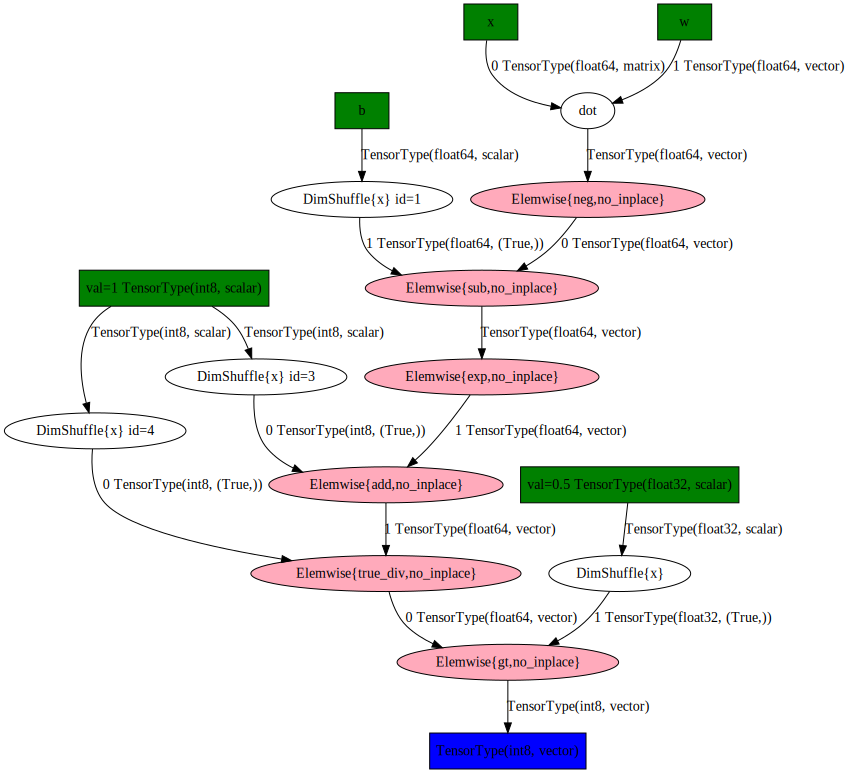

In [21]:
theano.printing.pydotprint(prediction, outfile="pics/logreg_pydotprint_prediction.svg", var_with_name_simple=True, format='svg') 
display(SVG(filename='pics/logreg_pydotprint_prediction.svg'))

d3v.d3viz(predict, 'examples/mlp.html')

The output file is available at pics/logreg_pydotprint_predict.svg


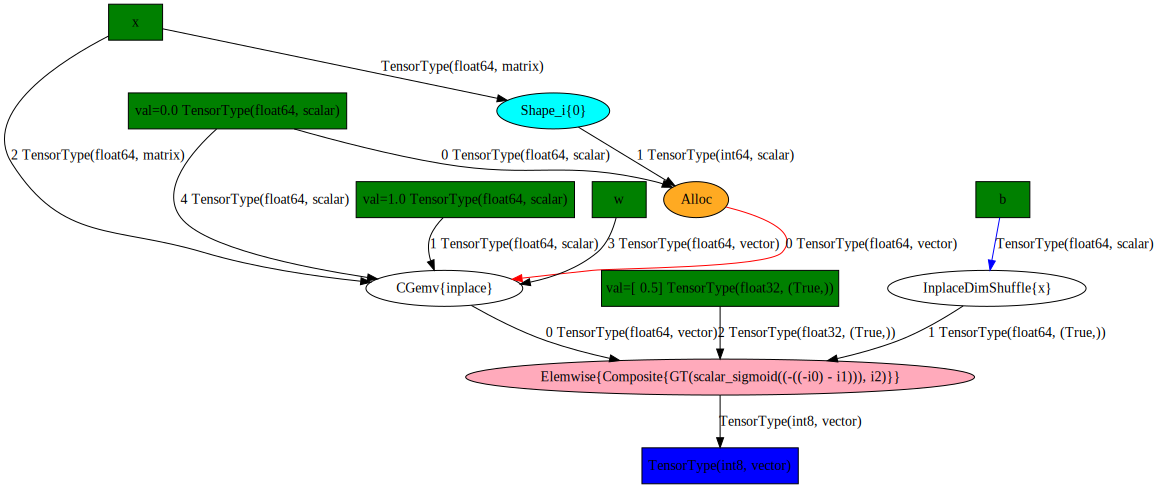

In [23]:
theano.printing.pydotprint(predict, outfile="pics/logreg_pydotprint_predict.svg", var_with_name_simple=True, format='svg') 
display(SVG(filename='pics/logreg_pydotprint_predict.svg'))

The output file is available at pics/logreg_pydotprint_train.svg


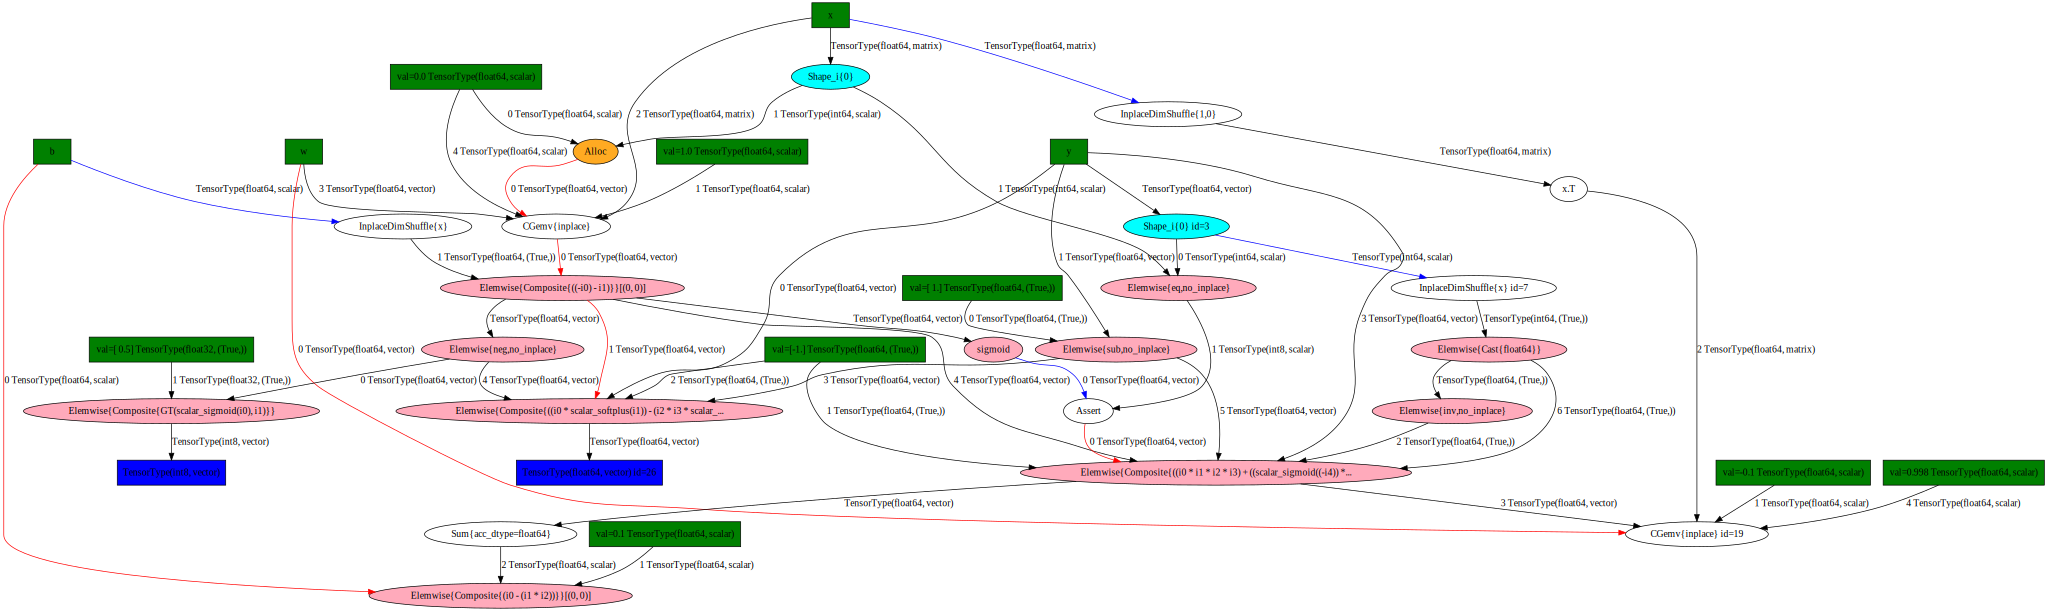

In [24]:
theano.printing.pydotprint(train, outfile="pics/logreg_pydotprint_train.svg", var_with_name_simple=True, format='svg') 
display(SVG(filename='pics/logreg_pydotprint_train.svg'))